In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
df1= pd.read_csv('marathon_results_2015.csv')
df2 = pd.read_csv('marathon_results_2016.csv')
df3 = pd.read_csv('marathon_results_2017.csv')

In [3]:
df3.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')

In [4]:
df_m = pd.concat([df1,df2],axis=0,ignore_index=True)

In [5]:
df_merge = pd.concat([df_m,df3],axis=0,ignore_index=True)

In [6]:
# Convert 'Official Time' and 'Pace' columns to seconds
df_merge['Official Time'] = df_merge['Official Time'].apply(lambda x: pd.to_timedelta(x).total_seconds())
df_merge['Pace'] = df_merge['Pace'].apply(lambda x: pd.to_timedelta(x).total_seconds())

In [7]:
# Split the data into features (X) and target (y)
X = df_merge['Pace'].values.reshape(-1, 1)
y = df_merge['Official Time'].values.reshape(-1, 1)

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=24)

In [9]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [10]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

In [11]:
# Evaluate the model
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R-squared: {r2:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

R-squared: 1.00
Mean Absolute Error: 7.73
Mean Squared Error: 20428.01


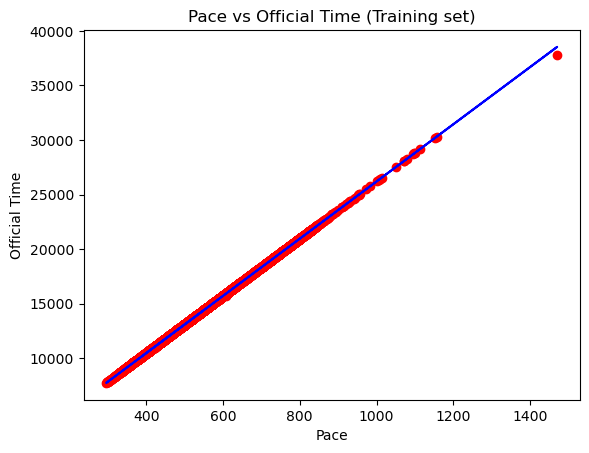

In [12]:
#Visualize training set results
#plot the actual data point of training set
plt.scatter(X_train,y_train,color = 'red')
#Plot the regreesion line
plt.plot(X_train, model.predict(X_train), color= 'blue')

plt.title('Pace vs Official Time (Training set)')
plt.xlabel('Pace')
plt.ylabel('Official Time')
plt.show()

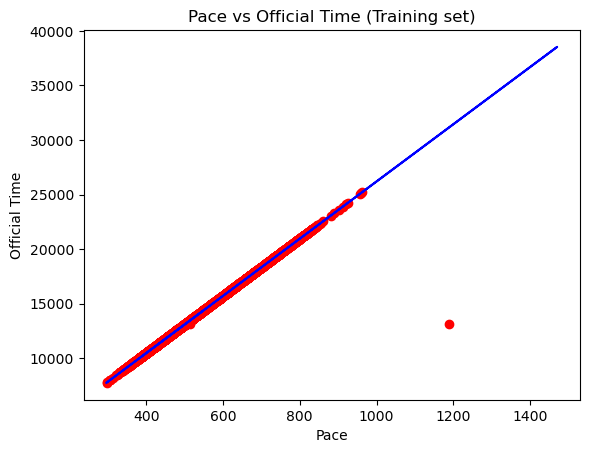

In [13]:
#Visualize training set results
#plot the actual data point of training set
plt.scatter(X_test,y_test,color = 'red')
#Plot the regreesion line
plt.plot(X_train, model.predict(X_train), color= 'blue')
plt.title('Pace vs Official Time (Training set)')
plt.xlabel('Pace')
plt.ylabel('Official Time')
plt.show()

In [14]:
# Make new predictions
print("*** Making predictions for new data***")

new_pace_for_predictions = [150,225,450,525,1150,1250,1600]

for new_pace in new_pace_for_predictions:
    new_pace_pred = model.predict(pd.DataFrame({'YearsExperience':[new_pace]}))
    print(f'Experience in Years: {new_pace} ... Predicted Salary : {new_pace_pred}')

*** Making predictions for new data***
Experience in Years: 150 ... Predicted Salary : [[3920.56754229]]
Experience in Years: 225 ... Predicted Salary : [[5886.83894242]]
Experience in Years: 450 ... Predicted Salary : [[11785.6531428]]
Experience in Years: 525 ... Predicted Salary : [[13751.92454293]]
Experience in Years: 1150 ... Predicted Salary : [[30137.519544]]
Experience in Years: 1250 ... Predicted Salary : [[32759.21474418]]
Experience in Years: 1600 ... Predicted Salary : [[41935.14794478]]


c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\base.py:

In [15]:
# Saving model (and anything else as pickle file)
import joblib
joblib.dump(model,'final_official_time_model.pkl')

['final_official_time_model.pkl']

In [16]:
X = pd.DataFrame(X,columns=['Pace'])


In [17]:
joblib.dump(list(X.columns),'official_time_column_names.pkl')

['official_time_column_names.pkl']

In [18]:
# Loading Model (Model persistence)
col_names = joblib.load('official_time_column_names.pkl')
print(col_names)

['Pace']


In [19]:
loaded_model = joblib.load('final_official_time_model.pkl')

In [20]:
# Make new predictions using the loaded model
print('*** making predictions for new data using loaded model ***')
print("*** Making predictions for new data***")

new_pace_for_predictions = [150,225,450,525,1150,1250,1600]

for new_pace in new_pace_for_predictions:
    new_pace_pred = loaded_model.predict(pd.DataFrame({'YearsExperience':[new_pace]}))
    print(f'Pace: {new_pace} ... Official Time : {new_pace_pred}')

*** making predictions for new data using loaded model ***
*** Making predictions for new data***
Pace: 150 ... Official Time : [[3920.56754229]]
Pace: 225 ... Official Time : [[5886.83894242]]
Pace: 450 ... Official Time : [[11785.6531428]]
Pace: 525 ... Official Time : [[13751.92454293]]
Pace: 1150 ... Official Time : [[30137.519544]]
Pace: 1250 ... Official Time : [[32759.21474418]]
Pace: 1600 ... Official Time : [[41935.14794478]]


c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
c:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\sklearn\base.py: